<a href="https://colab.research.google.com/github/thiru2024/Pathways-prediction-through-clustering/blob/main/Kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install Cdatatype

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization
import seaborn as sns  #Python library for Vidualization
from sklearn.preprocessing import LabelEncoder

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
path = pd.read_csv('/content/drive/My Drive/test-properties.csv')
df = pd.DataFrame(path)
df = df[~df['Pathway'].isnull()]
le = LabelEncoder()
df['Pathway'] = le.fit_transform(df['Pathway'])
df = df.fillna(df.median())
dxf = df.iloc[:,167:]
df=df.drop(['Metabolites','SMILES','InChI','INCHIKEY','IUPACName','CHEMICAL_FORMULA','CID','Molecular_weight',	'XLogP',	'ExactMass',	'MonoisotopicMass',	'TPSA',	'Complexity',	'Charge',	'HBondDonorCount',
                                                    'HBondAcceptorCount',	'RotatableBondCount',	'HeavyAtomCount',	'IsotopeAtomCount',	'AtomStereoCount',	'DefinedAtomStereoCount',	'UndefinedAtomStereoCount',
                                                    'BondStereoCount',	'DefinedBondStereoCount',	'UndefinedBondStereoCount',	'CovalentUnitCount',	'Volume3D',	'XStericQuadrupole3D',	'YStericQuadrupole3D',	'ZStericQuadrupole3D',
                                                    'FeatureCount3D',	'FeatureAcceptorCount3D',	'FeatureDonorCount3D',	'FeatureAnionCount3D',	'FeatureCationCount3D',	'FeatureRingCount3D',	'FeatureHydrophobeCount3D',
                                                    'ConformerModelRMSD3D',	'EffectiveRotorCount3D',	'ConformerCount3D'], axis = 1)
# df = df.iloc[:,3:168]
# le = LabelEncoder()
# df = df.apply(lambda col: le.fit_transform(df['Pathway'].astype(str)), axis=0, result_type='expand')
# df['Pathway'] = df['Pathway'].astype(str)
# # df['Pathway'] = le.fit_transform(df['Pathway'])
# df['Column6'] = df['Column6'].fillna(0)
# df['Pathway'] = le.fit_tra  nsform(df['Pathway'])
df = df.drop(['Pathway'], axis = 1)
# df['Pathway'] = le.fit_transform(df['Pathway'])
# df = df.loc[df["Column6"] != 'x']
# dataset = df.fillna(df.median())
dataset = df.astype(float)
dataset = dataset.astype('category',copy=False)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2857 entries, 0 to 7146
Columns: 167 entries, Column2 to Column168
dtypes: category(167)
memory usage: 508.4 KB


In [ ]:
from Cdatatype import datatypes

datatypes(df[['Pathway']])


column name:   [ Pathway ]
integer:         2857
string:          0
float:           0
complex_number:  0
boolean:         0
tuple:           0
list:            0
dictionary:      0
set:             0
null:            0


In [ ]:
dataset['Column6'].value_counts()
# dataset = dataset.drop(['Pathway'],axis=1)

0.0    2852
1.0       5
Name: Column6, dtype: int64

In [ ]:
import pycaret
from pycaret.clustering import *
data = dataset.sample(frac=1, random_state=752)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (2857, 167)
Unseen Data For Predictions: (0, 167)


In [ ]:
import pycaret
from pycaret.clustering import *

exp_clu101 = setup(data, categorical_features = ['Column2',	'Column3',	'Column4',	'Column5',	'Column6',	'Column7',	'Column8',	'Column9',	'Column10',	'Column11',	'Column12',	'Column13',	'Column14',	'Column15',	'Column16',
                                                    'Column17',	'Column18',	'Column19',	'Column20',	'Column21',	'Column22',	'Column23',	'Column24',	'Column25',	'Column26',	'Column27',
                                                    'Column28',	'Column29',	'Column30',	'Column31',	'Column32',	'Column33',	'Column34',	'Column35',	'Column36', 'Column37',	'Column38',	'Column39',
                                                    'Column40',	'Column41',	'Column42',	'Column43',	'Column44',	'Column45',	'Column46',	'Column47',	'Column48',	'Column49',	'Column50',	'Column51',
                                                    'Column52',	'Column53',	'Column54',	'Column55',	'Column56',	'Column57',	'Column58',	'Column59',	'Column60',	'Column61',	'Column62',	'Column63',
                                                    'Column64',	'Column65',	'Column66',	'Column67',	'Column68',	'Column69',	'Column70',	'Column71',	'Column72',	'Column73',	'Column74',	'Column75',
                                                    'Column76',	'Column77',	'Column78',	'Column79',	'Column80',	'Column81',	'Column82',	'Column83',	'Column84',	'Column85',	'Column86',	'Column87',	'Column88',
                                                    'Column89',	'Column90',	'Column91',	'Column92',	'Column93',	'Column94',	'Column95',	'Column96',	'Column97',	'Column98',	'Column99',	'Column100',	'Column101',
                                                    'Column102',	'Column103',	'Column104',	'Column105',	'Column106',	'Column107',	'Column108',	'Column109',	'Column110',	'Column111',	'Column112',	'Column113',	'Column114',
                                                    'Column115',	'Column116',	'Column117',	'Column118',	'Column119',	'Column120',	'Column121',	'Column122',	'Column123',	'Column124',	'Column125',	'Column126',	'Column127',
                                                    'Column128',	'Column129',	'Column130',	'Column131',	'Column132',	'Column133',	'Column134',	'Column135',	'Column136',	'Column137',  'Column138',	'Column139',	'Column140',
                                                    'Column141',	'Column142',	'Column143',	'Column144',	'Column145',	'Column146',	'Column147',	'Column148',	'Column149',	'Column150',	'Column151',	'Column152',	'Column153',
                                                    'Column154',	'Column155',	'Column156',	'Column157',	'Column158',	'Column159',	'Column160',	'Column161',	'Column162',	'Column163',	'Column164',	'Column165',	'Column166',
                                                    'Column167',	'Column168'])

,Description,Value
0,session_id,964
1,Original Data,"(5426, 167)"
2,Missing Values,False
3,Numeric Features,0
4,Categorical Features,167
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(5426, 324)"
9,CPU Jobs,-1


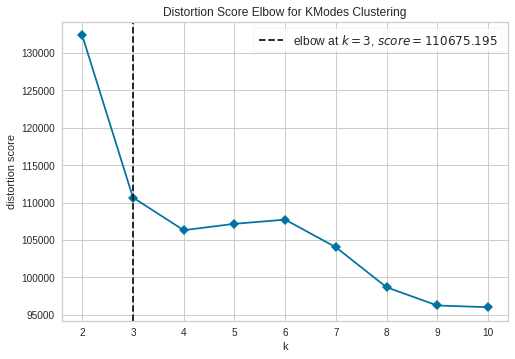

In [ ]:
# kmodes = create_model('kmodes')
plot_model(kmodes, plot = 'elbow')

In [ ]:
kmodes = create_model('kmodes', num_clusters = 3)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3379,1161.8967,1.7,0,0,0


In [ ]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [ ]:
# import pickle
# model = pickle.load(open("/content/drive/My Drive/metabolites-pathways-prediction-kmodes.pkl", "rb"))
# kmodes = model
# saved_kmeans = load_model('/content/drive/My Drive/metabolites-pathways-prediction-kmodes')
# kmean_results = assign_model(kmodes)
# kmean_results.head()


In [ ]:
# kmodes = saved_kmeans
# plot_model(kmodes,feature = 'Pathway', label = True)

In [ ]:
# plot_model(kmodes, plot = 'elbow')

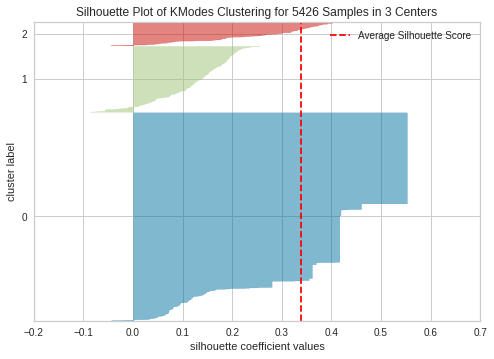

In [ ]:
plot_model(kmodes, plot = 'silhouette')

In [ ]:
plot_model(kmodes, plot = 'distribution')

In [ ]:
plot_model(kmodes, plot = 'distribution', feature = 'Pathway')

In [ ]:
plot_model(kmodes, plot = 'distribution', feature = 'Pathway')

In [ ]:
save_model(kmodes,'/content/drive/My Drive/metabolites-pathways-prediction-kmeans-5')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['Column2',
                                                             'Column3',
                                                             'Column4',
                                                             'Column5',
                                                             'Column6',
                                                             'Column7',
                                                             'Column8',
                                                             'Column9',
                                                             'Column10',
                                                             'Column11',
                                                             'Column12',
                                                             'Column13',
                                                             'Column14',
        

In [ ]:
saved_kmeans = load_model('/content/drive/My Drive/metabolites-pathways-prediction-kmeans-5')
new_prediction = predict_model(saved_kmeans, data=data)
new_prediction.head(5)


Transformation Pipeline and Model Successfully Loaded


,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,...,Column160,Column161,Column162,Column163,Column164,Column165,Column166,Column167,Column168,Cluster
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,Cluster 0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Cluster 1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,Cluster 1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Cluster 1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,Cluster 2


In [ ]:
dtf = dxf[~dxf['Pathway'].isnull()]
dtf = dtf.astype('category',copy=False)
dtf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2857 entries, 0 to 7146
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   SMILES                    2857 non-null   category
 1   Molecular_weight          2857 non-null   category
 2   CID                       2857 non-null   category
 3   CHEMICAL_FORMULA          2852 non-null   category
 4   InChI                     2852 non-null   category
 5   INCHIKEY                  2842 non-null   category
 6   IUPACName                 2842 non-null   category
 7   XLogP                     2857 non-null   category
 8   ExactMass                 2857 non-null   category
 9   MonoisotopicMass          2857 non-null   category
 10  TPSA                      2857 non-null   category
 11  Complexity                2857 non-null   category
 12  Charge                    2857 non-null   category
 13  HBondDonorCount           2857 non-null   catego

In [ ]:
# result = pd.concat([dtf,new_prediction], axis=1)
new_prediction.to_csv('/content/drive/My Drive/new-m-clusters-test.csv',index=False)
dtf.to_csv('/content/drive/My Drive/new-m-clusters-part-test.csv',index=False)

In [ ]:
# kmodes = saved_kmeans
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6308 entries, 0 to 7158
Columns: 236 entries, Pathway to Cluster
dtypes: category(235), object(1)
memory usage: 2.2+ MB


In [ ]:
kmean_results.to_csv('/content/drive/My Drive/metabolites-pathways-prediction-kmeans.csv')